# PLOT ROCs

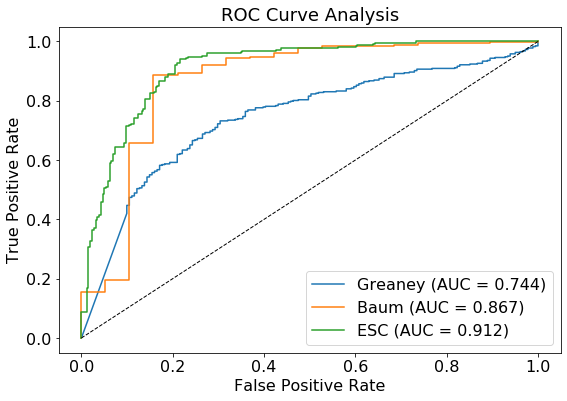

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset_names = ["Greaney", "Baum"]
stats_dirs = [os.path.join("exp_outputs", name, "stats") for name in dataset_names]

# load best zero-shot curves for both datasets
zero_curves = {}
for name, d in zip(dataset_names, stats_dirs):
    df = pd.read_csv(os.path.join(d, "Zero.csv"))
    idx = df["auc"].idxmax()
    fpr = np.fromstring(df["fpr"].iloc[idx].strip("[]"), sep=", ")
    tpr = np.fromstring(df["tpr"].iloc[idx].strip("[]"), sep=", ")
    auc = df["auc"].iloc[idx]
    zero_curves[name] = (fpr, tpr, auc)

# load best test curve for Greaney
df_test = pd.read_csv(os.path.join(stats_dirs[0], "Test.csv"))
idx_test = df_test["auc"].idxmax()
test_fpr = np.fromstring(df_test["fpr"].iloc[idx_test].strip("[]"), sep=", ")
test_tpr = np.fromstring(df_test["tpr"].iloc[idx_test].strip("[]"), sep=", ")
test_auc = df_test["auc"].iloc[idx_test]

# load best eval curve for Greaney
df_eval = pd.read_csv(os.path.join(stats_dirs[0], "Eval.csv"))
idx_eval = df_eval["auc"].idxmax()
eval_fpr = np.fromstring(df_eval["fpr"].iloc[idx_eval].strip("[]"), sep=", ")
eval_tpr = np.fromstring(df_eval["tpr"].iloc[idx_eval].strip("[]"), sep=", ")
eval_auc = df_eval["auc"].iloc[idx_eval]

# plot all four curves
plt.figure(figsize=(9, 6))
for name in dataset_names:
    fpr, tpr, auc = zero_curves[name]
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")
plt.plot(test_fpr, test_tpr, label=f"ESC (AUC = {test_auc:.3f})")
#plt.plot(eval_fpr, eval_tpr, label=f"Eval (AUC = {eval_auc:.3f})")
plt.plot([0, 1], [0, 1], "k--", linewidth=1)

plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title("ROC Curve Analysis", fontsize=18)
plt.legend(loc="lower right", fontsize=16)
plt.grid(False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig("exp_outputs/ROC.pdf", format="pdf", bbox_inches="tight")
plt.show()
